In [1]:
import pandas as pd
import numpy as np  #numerical processing
import seaborn as sn #for visualization
import matplotlib.pyplot as plt   #for visualization
%matplotlib inline

In [2]:
# reading dataset present in local
df = pd.read_csv('/content/Placement_Data_Full_Class.csv')
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialization,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [3]:
df.info() #to check null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialization  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [4]:
# seperate the categorical and numerical columns
catvars = list(df.select_dtypes(include = ['object']).columns) #ex: gender
# .columns becuz I need column names
numvars = list(df.select_dtypes(include = ['int32', 'int64', 'float32', 'float64']).columns)

print(catvars, numvars)

['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialization', 'status'] ['sl_no', 'ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']


In [5]:
df.isnull().sum()
#null values in salary

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialization     0
mba_p              0
status             0
salary            67
dtype: int64

**Handle null values**

In [6]:
df.shape

(215, 15)

In [7]:
# to see the distribution using mean median mode
def plotdisplot(col):
    plt.figure(figsize = (15, 7))
    sn.distplot(df['salary'], kde = True, hist = False, label = 'Actual Salary', color = 'orange') #distribution plot
    # kde: kernel distribution estimation
    sn.distplot(df[col], kde = True, hist = False, label = col, color = 'black')

In [8]:
mostfreq = list(dict(df['salary'].value_counts()).items())[0]
mostfreq
#most frequently occuring salary value

(300000.0, 22)

In [9]:
# better replacement of above code cell
df['salary'].mode()[0]

300000.0

In [10]:
# create salary mean, median, mode and compare each with original salary 
# and find which one is similar
df['salary_mean'] = df['salary'].fillna(df['salary'].mean())
df['salary_median'] = df['salary'].fillna(df['salary'].median())
df['salary_mode'] = df['salary'].fillna(df['salary'].mode()[0])
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialization,mba_p,status,salary,salary_mean,salary_median,salary_mode
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0,270000.000000,270000.0,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0,200000.000000,200000.0,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0,250000.000000,250000.0,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN,288655.405405,265000.0,300000.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0,425000.000000,425000.0,425000.0


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

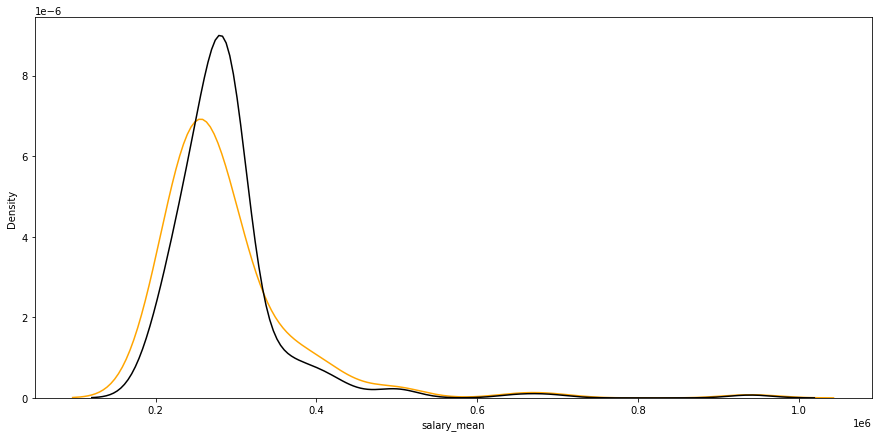

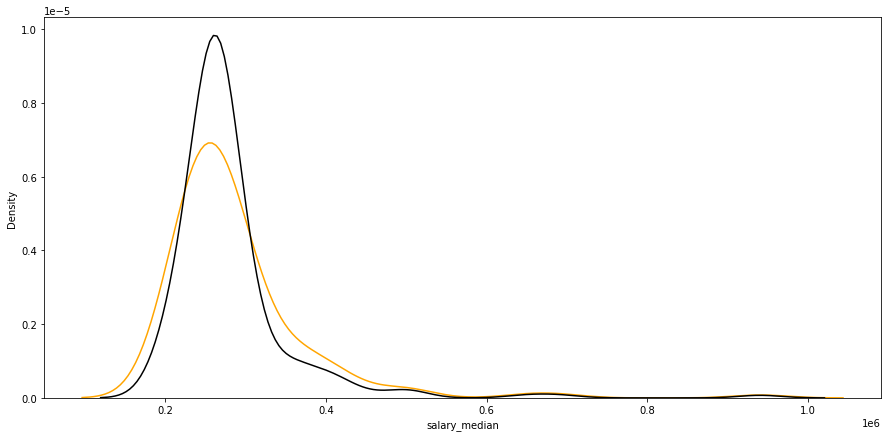

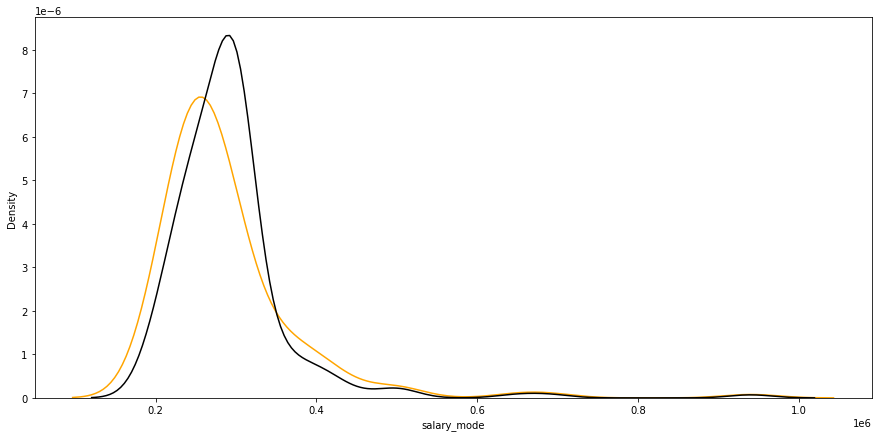

In [11]:
#plotting the above result
sallist = ['salary_mean', 'salary_median', 'salary_mode']
for sal in sallist:
    plotdisplot(sal)

In [12]:
# so we are filling the salary with mean

df['salary'] = df['salary'].fillna(df['salary'].mean())
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialization,mba_p,status,salary,salary_mean,salary_median,salary_mode
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.000000,270000.000000,270000.0,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.000000,200000.000000,200000.0,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.000000,250000.000000,250000.0,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,288655.405405,288655.405405,265000.0,300000.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.000000,425000.000000,425000.0,425000.0


In [13]:
# dropping the temporarily created columns
df = df.drop(columns = ['salary_mean', 'salary_median', 'salary_mode'], axis = 1)
df.isnull().sum() # checking null values

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialization    0
mba_p             0
status            0
salary            0
dtype: int64

# **EDA**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


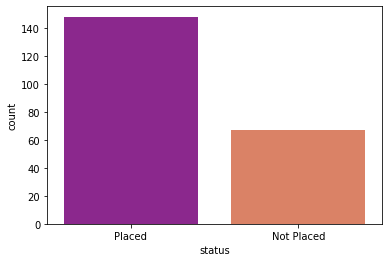

In [14]:
sn.countplot(df['status'], palette = 'plasma')

Count Plot for feature gender is shown below.


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


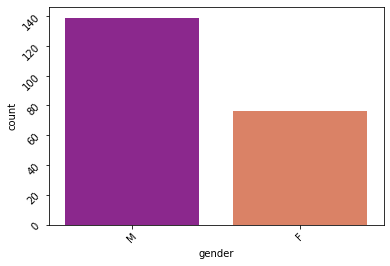

Count Plot for feature ssc_b is shown below.


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


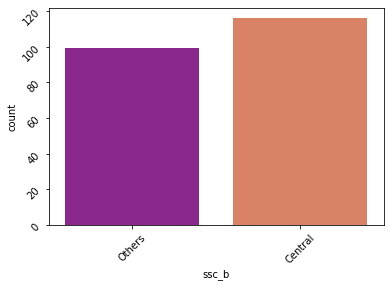

Count Plot for feature hsc_b is shown below.


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


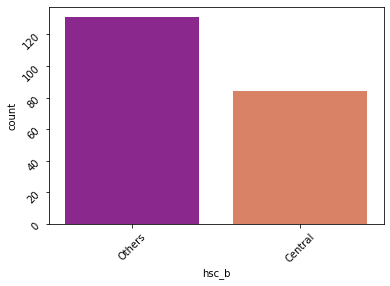

Count Plot for feature hsc_s is shown below.


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


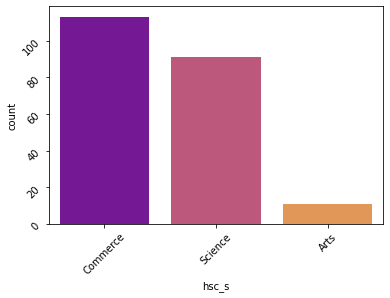

Count Plot for feature degree_t is shown below.


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


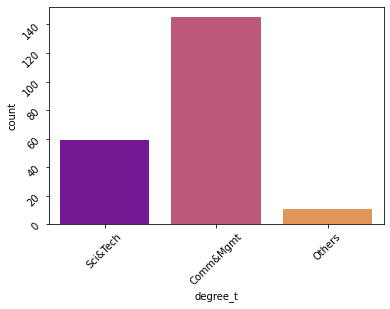

Count Plot for feature workex is shown below.


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


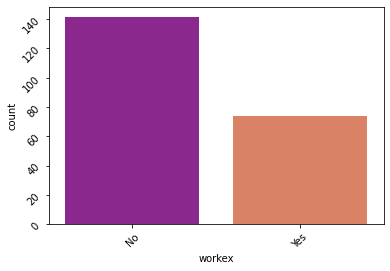

Count Plot for feature specialization is shown below.


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


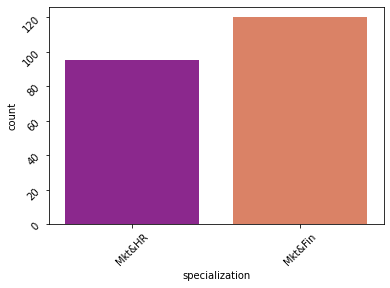

Count Plot for feature status is shown below.


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


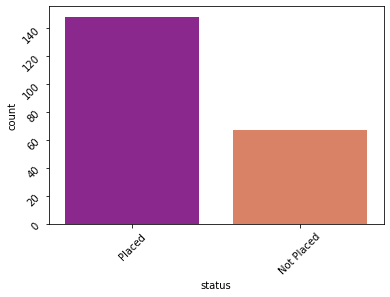

In [15]:
def valuecount(col):
  return dict(df[col].value_counts())

def getcountplot(col):
  sn.countplot(df[col], palette = 'plasma')
  plt.xticks(rotation = '45', fontsize = '10')
  plt.yticks(rotation = '45', fontsize = '10')
  plt.show()

for col in catvars: # catvars is categorical variables
  print(f'Count Plot for feature {col} is shown below.')
  getcountplot(col)
  print('='*75)

In [16]:
# to get more relevant data
getfinaldict = {}
for col in catvars:
  getfinaldict[col] = valuecount(col)

getfinaldict

{'gender': {'M': 139, 'F': 76},
 'ssc_b': {'Central': 116, 'Others': 99},
 'hsc_b': {'Others': 131, 'Central': 84},
 'hsc_s': {'Commerce': 113, 'Science': 91, 'Arts': 11},
 'degree_t': {'Comm&Mgmt': 145, 'Sci&Tech': 59, 'Others': 11},
 'workex': {'No': 141, 'Yes': 74},
 'specialization': {'Mkt&Fin': 120, 'Mkt&HR': 95},
 'status': {'Placed': 148, 'Not Placed': 67}}

In [17]:
# top science students placed
df[(df['degree_t'] == 'Sci&Tech')&(df['status'] == 'Placed')].sort_values(by = 'salary', ascending = False).reset_index().head(5)

,index,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialization,mba_p,status,salary
0,150,151,M,71.00,Central,58.66,Central,Science,58.00,Sci&Tech,Yes,56.0,Mkt&Fin,61.30,Placed,690000.0
1,77,78,M,64.00,Others,80.00,Others,Science,65.00,Sci&Tech,Yes,69.0,Mkt&Fin,57.65,Placed,500000.0
2,163,164,M,63.00,Others,67.00,Others,Science,64.00,Sci&Tech,No,75.0,Mkt&Fin,66.46,Placed,500000.0
3,174,175,M,73.24,Others,50.83,Others,Science,64.27,Sci&Tech,Yes,64.0,Mkt&Fin,66.23,Placed,500000.0
4,53,54,M,80.00,Others,70.00,Others,Science,72.00,Sci&Tech,No,87.0,Mkt&HR,71.04,Placed,450000.0


In [18]:
# for Commerce students
df[(df['degree_t'] == 'Comm&Mgmt')&(df['status'] == 'Placed')].sort_values(by = 'salary', ascending = False).reset_index().head(5)

,index,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialization,mba_p,status,salary
0,119,120,M,60.8,Central,68.4,Central,Commerce,64.6,Comm&Mgmt,Yes,82.66,Mkt&Fin,64.34,Placed,940000.0
1,177,178,F,73.0,Central,97.0,Others,Commerce,79.0,Comm&Mgmt,Yes,89.00,Mkt&Fin,70.81,Placed,650000.0
2,4,5,M,85.8,Central,73.6,Central,Commerce,73.3,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,Placed,425000.0
3,95,96,M,73.0,Central,78.0,Others,Commerce,65.0,Comm&Mgmt,Yes,95.46,Mkt&Fin,62.16,Placed,420000.0
4,210,211,M,80.6,Others,82.0,Others,Commerce,77.6,Comm&Mgmt,No,91.00,Mkt&Fin,74.49,Placed,400000.0


In [19]:
# max and min salary
df[(df['salary'] == max(df['salary'])) | (df['salary'] == min(df['salary']))]
# observation : max salary is 9,40,000 and min salary is 2,00,000

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialization,mba_p,status,salary
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28,Placed,200000.0
15,16,F,65.00,Central,75.00,Central,Commerce,69.00,Comm&Mgmt,Yes,72.00,Mkt&Fin,64.66,Placed,200000.0
44,45,F,77.00,Others,73.00,Others,Commerce,81.00,Comm&Mgmt,Yes,89.00,Mkt&Fin,69.70,Placed,200000.0
50,51,F,75.20,Central,73.20,Central,Science,68.40,Comm&Mgmt,No,65.00,Mkt&HR,62.98,Placed,200000.0
107,108,M,82.00,Others,90.00,Others,Commerce,83.00,Comm&Mgmt,No,80.00,Mkt&HR,73.52,Placed,200000.0
119,120,M,60.80,Central,68.40,Central,Commerce,64.60,Comm&Mgmt,Yes,82.66,Mkt&Fin,64.34,Placed,940000.0
135,136,F,72.00,Central,56.00,Others,Science,69.00,Comm&Mgmt,No,55.60,Mkt&HR,65.63,Placed,200000.0


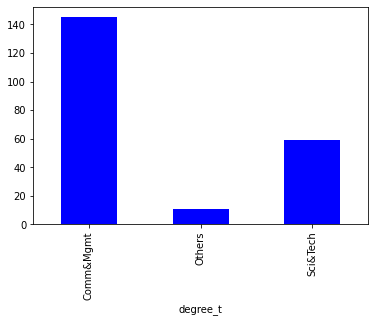

In [20]:
# maximum students placed are from commerce

df.groupby(['degree_t'])['status'].count().plot(kind = 'bar', color = 'blue')

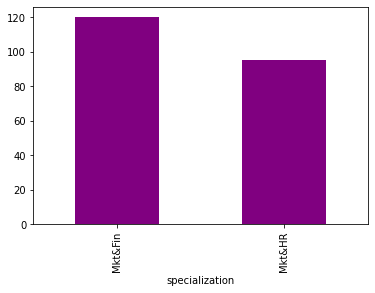

In [21]:
# for specialization

df.groupby(['specialization'])['status'].count().plot(kind = 'bar', color = 'purple')
# marketing and finance specialization are placed more

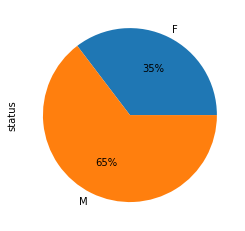

In [22]:
# gender ratio

df.groupby(['gender'])['status'].count().plot(kind = 'pie', autopct = '%1.0f%%')

In [23]:
# max female salary - 6,50,000

temp = df[df['gender']=='F']
temp[temp['salary']==max(temp['salary'])].style.background_gradient(cmap = 'plasma')

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialization,mba_p,status,salary
177,178,F,73.000000,Central,97.000000,Others,Commerce,79.000000,Comm&Mgmt,Yes,89.000000,Mkt&Fin,70.810000,Placed,650000.000000


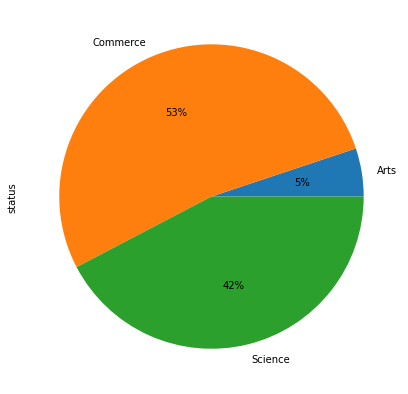

In [24]:
df.groupby(['hsc_s'])['status'].count().plot(kind = 'pie', autopct ='%1.0f%%', figsize= (15,7))

In [25]:
getfinaldict

{'gender': {'M': 139, 'F': 76},
 'ssc_b': {'Central': 116, 'Others': 99},
 'hsc_b': {'Others': 131, 'Central': 84},
 'hsc_s': {'Commerce': 113, 'Science': 91, 'Arts': 11},
 'degree_t': {'Comm&Mgmt': 145, 'Sci&Tech': 59, 'Others': 11},
 'workex': {'No': 141, 'Yes': 74},
 'specialization': {'Mkt&Fin': 120, 'Mkt&HR': 95},
 'status': {'Placed': 148, 'Not Placed': 67}}

# Label Encoding Process

Label Encoding refers to converting the labels into a numeric form so as to convert them into the machine-readable form. Machine learning algorithms can then decide in a better way how those labels must be operated. It is an important pre-processing step for the structured dataset in supervised learning.

In [26]:
def labelencode(le, col):
  df[col]= le.fit_transform(df[col])

getmappings = {}
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in list(getfinaldict.keys()):
  labelencode(le, col)
  getmappings[col] = dict(zip(le.classes_,le.transform(le.classes_)))
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialization,mba_p,status,salary
0,1,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.000000
1,2,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.000000
2,3,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.000000
3,4,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,288655.405405
4,5,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.000000


In [27]:
getmappings

{'gender': {'F': 0, 'M': 1},
 'ssc_b': {'Central': 0, 'Others': 1},
 'hsc_b': {'Central': 0, 'Others': 1},
 'hsc_s': {'Arts': 0, 'Commerce': 1, 'Science': 2},
 'degree_t': {'Comm&Mgmt': 0, 'Others': 1, 'Sci&Tech': 2},
 'workex': {'No': 0, 'Yes': 1},
 'specialization': {'Mkt&Fin': 0, 'Mkt&HR': 1},
 'status': {'Not Placed': 0, 'Placed': 1}}

In [28]:
# removing unwanted columns

df = df.drop(['sl_no'], axis = 1)
df.head(2)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialization,mba_p,status,salary
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.0
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0


# Numerical Columns EDA

Checking if the distribution is following some kind of particular distribution like Gaussion, Left skewed or Right skewed. If it's distorted then we will do some transformation to it.

In [29]:
numvars[1:]

['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']

Distribution plots for col: ssc_p are shown below


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


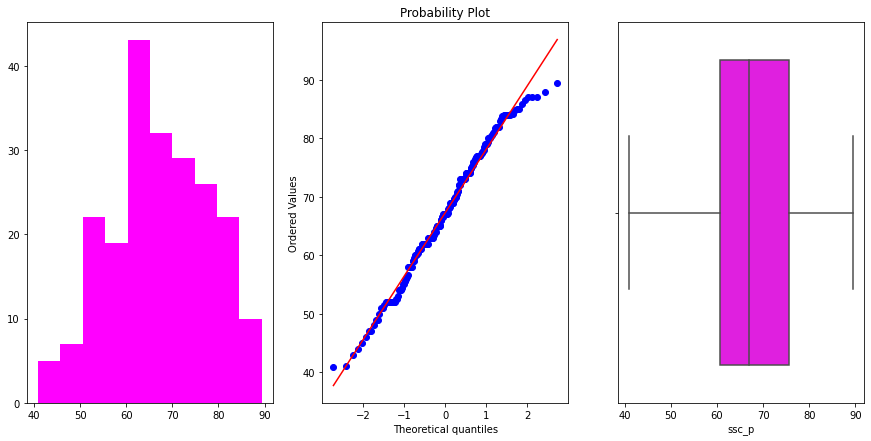

Distribution plots for col: hsc_p are shown below


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


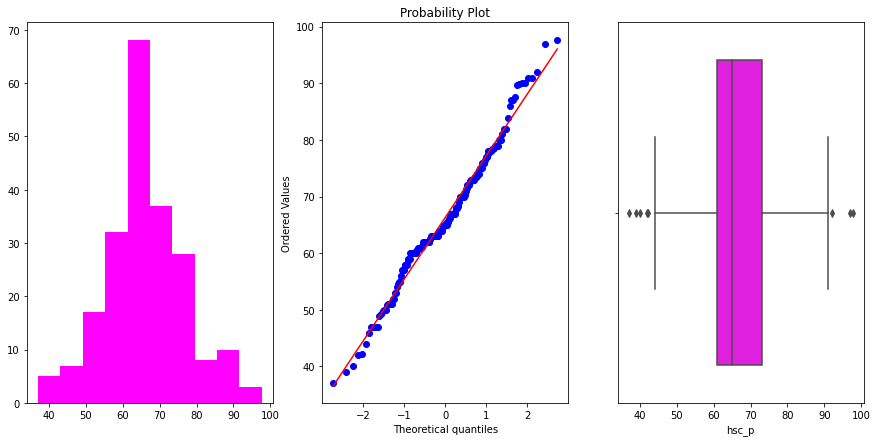

Distribution plots for col: degree_p are shown below


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


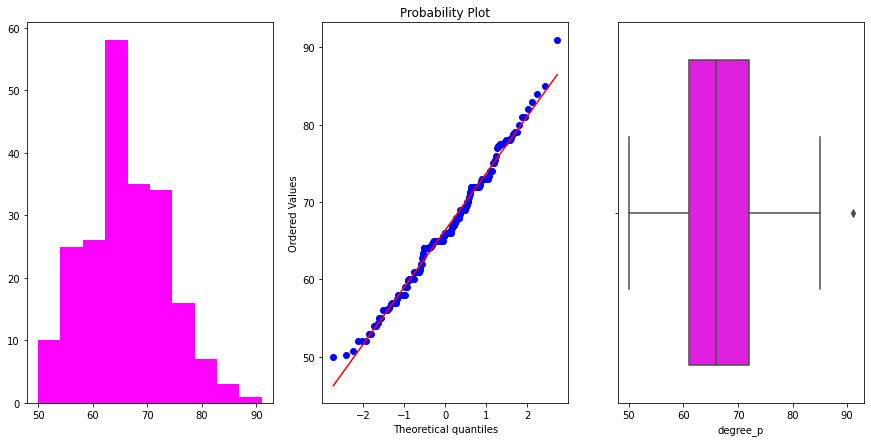

Distribution plots for col: etest_p are shown below


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


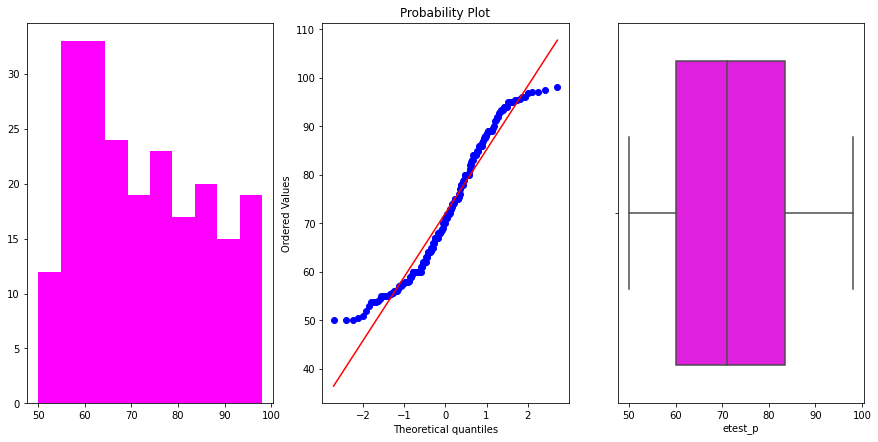

Distribution plots for col: mba_p are shown below


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


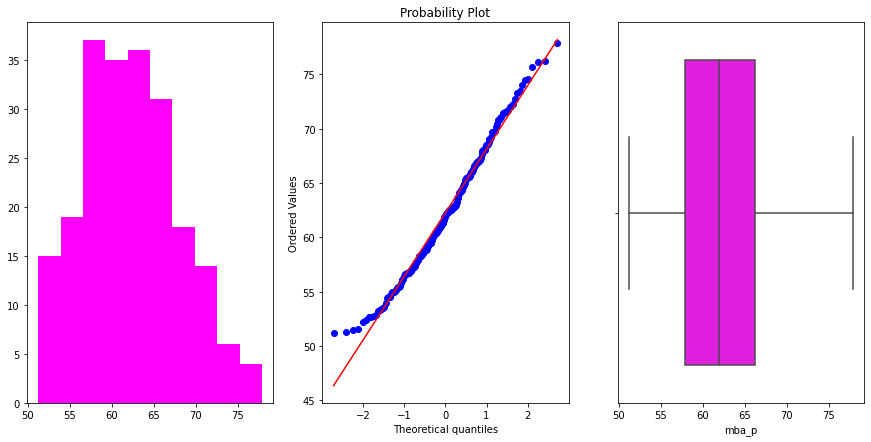

Distribution plots for col: salary are shown below


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


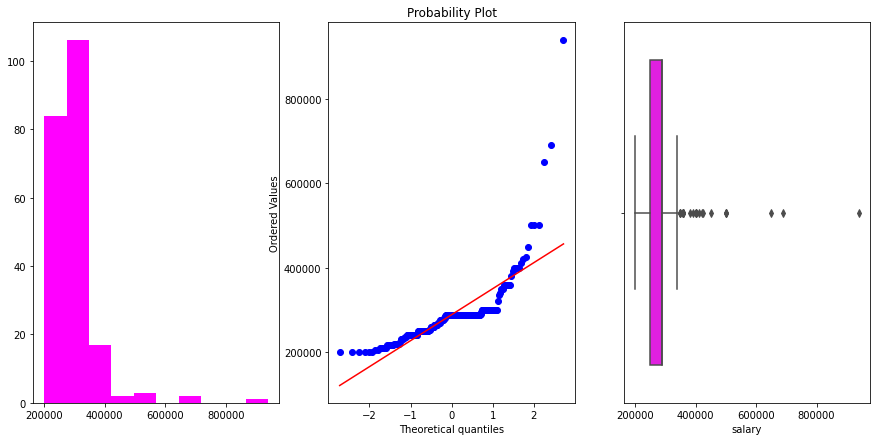

In [30]:
import scipy.stats as stats

def getplots(df, col):
  plt.figure(figsize = (15, 7))
  plt.subplot(1,3,1)
  plt.hist(df[col], color = 'magenta')

  plt.subplot(1,3,2)
  stats.probplot(df[col], dist='norm', plot=plt)

  plt.subplot(1,3,3)
  sn.boxplot(df[col], color = 'magenta')

  plt.show()

for col in numvars[1:]: 
  print(f'Distribution plots for col: {col} are shown below')
  getplots(df,col)
  print('='*10) # for separating the plots

# Feature Selection

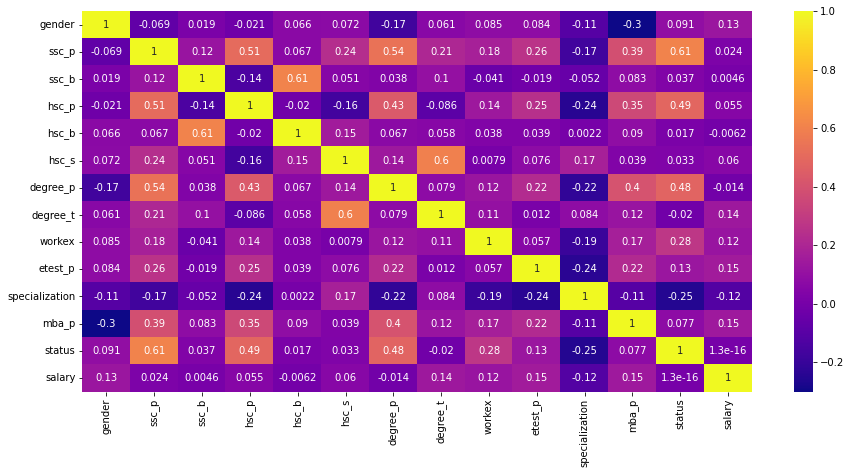

In [31]:
# checking for tightly correlated features

plt.figure(figsize=(15, 7))
sn.heatmap(df.corr(), annot=True, cmap='plasma')
#there is no specific correlation

In [32]:
# dropping salary column

data = df.copy()
test = data['status']
train = data.drop(['status', 'salary'], axis = 1)
train.head(2)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialization,mba_p
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28


Extremely Randomized Trees Classifier(**Extra Trees Classifier**) is a type of ensemble learning technique which aggregates the results of multiple de-correlated decision trees collected in a “forest” to output it’s classification result. In concept, it is very similar to a Random Forest Classifier and only differs from it in the manner of construction of the decision trees in the forest.

In [33]:
# using extratrees classsifier

from sklearn.ensemble import ExtraTreesClassifier
ec = ExtraTreesClassifier()
ec.fit(train, test)

ExtraTreesClassifier()

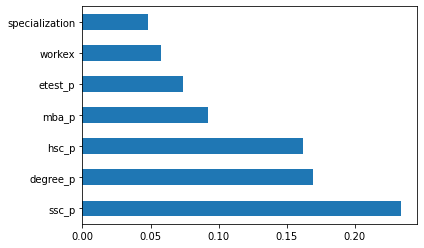

In [34]:
featbar = pd.Series(ec.feature_importances_, index = train.columns)
featbar.nlargest(7).plot(kind = 'barh')
# 7 most important columns

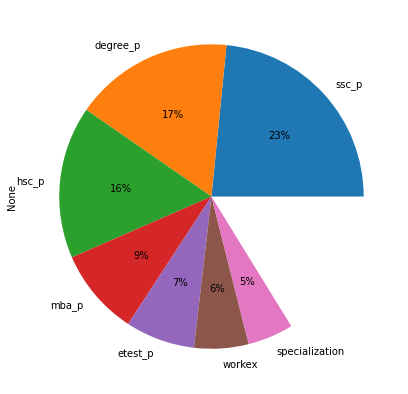

In [35]:
featbar.nlargest(7).plot(kind = 'pie', autopct = '%1.0f%%', figsize =(15,7))

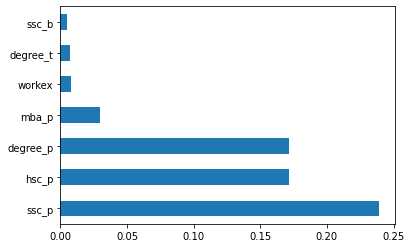

In [36]:
# mustual classif (another technique)

from sklearn.feature_selection import mutual_info_classif
mc = mutual_info_classif(train, test)
ax = pd.Series(mc, index = train.columns)
ax.nlargest(7).plot(kind = 'barh')

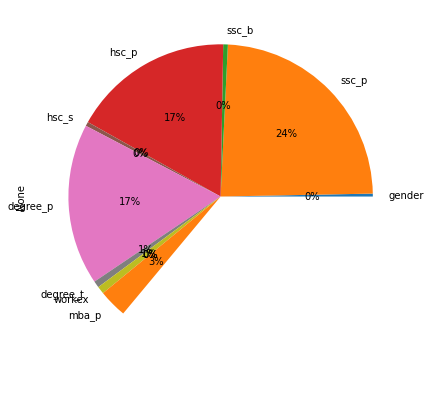

In [37]:
pd.Series(mc, index = train.columns).plot(kind = 'pie', autopct = '%1.0f%%', figsize =(15,7))

In [38]:
'''
Selecting the top 10 contributing features in above cases
and then we will do the intersection of both the results
so that we will get atleast top 5 most contributing features.
'''

featcol = list(featbar.nlargest(10).index)
mutclasif = list(ax.nlargest(10).index)
commoncols = list(set(featcol).intersection(set(mutclasif)))
print(commoncols)

['gender', 'ssc_b', 'workex', 'degree_p', 'hsc_s', 'hsc_p', 'ssc_p', 'mba_p']


In [39]:
# selecting the common cols for training
# these cols were selected as a nlargest result of 2 feature selection techniques

train = df[commoncols]
train.head()

,gender,ssc_b,workex,degree_p,hsc_s,hsc_p,ssc_p,mba_p
0,1,1,0,58.00,1,91.00,67.00,58.80
1,1,0,1,77.48,2,78.33,79.33,66.28
2,1,0,0,64.00,0,68.00,65.00,57.80
3,1,0,0,52.00,2,52.00,56.00,59.43
4,1,0,0,73.30,1,73.60,85.80,55.50


In [ ]:
'''
From the above dataframe we notice that gender, soecialization, degree_t,
workex are the categorical columns and for any placement drive students
are first filtered on basis of boards, sem scores and then work experience.
'''
getmappings

In [42]:
# renaming the columns

train = train[['workex', 'ssc_p', 'ssc_b','hsc_s', 'hsc_p', 'degree_p', 'mba_p', 'gender']]
train.columns = ['Work Experince', 'SSC_p', 'SSC_b','HSC_s', 'High School_p', 'Degree_p', 'MBA_p', 'Gender']
train.head()

,Work Experince,SSC_p,SSC_b,HSC_s,High School_p,Degree_p,MBA_p,Gender
0,0,67.00,1,1,91.00,58.00,58.80,1
1,1,79.33,0,2,78.33,77.48,66.28,1
2,0,65.00,0,0,68.00,64.00,57.80,1
3,0,56.00,0,2,52.00,52.00,59.43,1
4,0,85.80,0,1,73.60,73.30,55.50,1


# Model Building

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn import metrics

In [44]:
# 80% to training and 20% for test

X_train, X_test, y_train, y_test = train_test_split(train,test,test_size=0.2)
X_train.shape, X_test.shape

((172, 8), (43, 8))

[Text(0.34375, 0.95, 'SSC_p <= 55.64\ngini = 0.426\nsamples = 172\nvalue = [53, 119]\nclass = Placed'),
 Text(0.07142857142857142, 0.85, 'HSC_s <= 1.5\ngini = 0.17\nsamples = 32\nvalue = [29, 3]\nclass = Not Placed'),
 Text(0.03571428571428571, 0.75, 'gini = 0.0\nsamples = 21\nvalue = [21, 0]\nclass = Not Placed'),
 Text(0.10714285714285714, 0.75, 'High School_p <= 57.0\ngini = 0.397\nsamples = 11\nvalue = [8, 3]\nclass = Not Placed'),
 Text(0.07142857142857142, 0.65, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]\nclass = Not Placed'),
 Text(0.14285714285714285, 0.65, 'SSC_b <= 0.5\ngini = 0.5\nsamples = 6\nvalue = [3, 3]\nclass = Not Placed'),
 Text(0.10714285714285714, 0.55, 'MBA_p <= 57.55\ngini = 0.48\nsamples = 5\nvalue = [3, 2]\nclass = Not Placed'),
 Text(0.07142857142857142, 0.45, 'SSC_p <= 52.3\ngini = 0.444\nsamples = 3\nvalue = [1, 2]\nclass = Placed'),
 Text(0.03571428571428571, 0.35, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = Not Placed'),
 Text(0.10714285714285714, 0.35

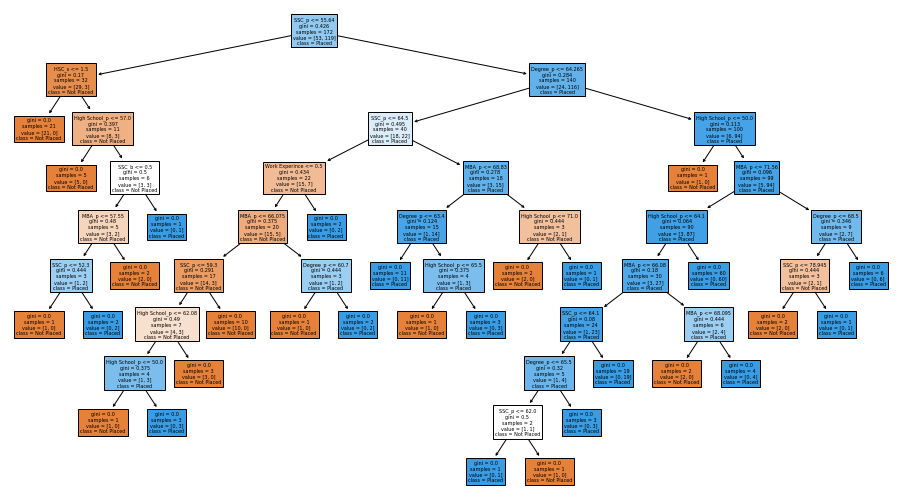

In [45]:
dc = DecisionTreeClassifier()
dc.fit(X_train, y_train)
plt.figure(figsize=(16,9))
# to plot tree
tree.plot_tree(dc, filled= True, class_names = ['Not Placed','Placed'], feature_names=train.columns)

In [46]:
# prune the tree
costpath = dc.cost_complexity_pruning_path(train, test)
ccp_alpha, imporities = costpath.ccp_alphas, costpath.impurities

In [47]:
modellist = [] # list of decision tree objects
for alpha in ccp_alpha:
  dc = DecisionTreeClassifier(ccp_alpha = alpha)
  dc.fit(X_train, y_train)
  modellist.append(dc)

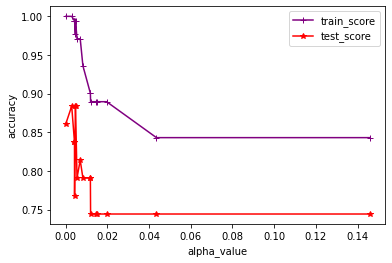

In [48]:
train_score = [clf.score(X_train, y_train) for clf in modellist]
test_score = [clf.score(X_test, y_test) for clf in modellist]

plt.xlabel('alpha_value')
plt.ylabel('accuracy')
plt.plot(ccp_alpha, train_score, label = 'train_score', marker= '+', color = 'purple')
plt.plot(ccp_alpha, test_score, label ='test_score', marker = '*', color = 'red')
plt.legend()
plt.show()

[Text(0.4, 0.875, 'SSC_p <= 55.64\ngini = 0.426\nsamples = 172\nvalue = [53, 119]\nclass = Placed'),
 Text(0.2, 0.625, 'gini = 0.17\nsamples = 32\nvalue = [29, 3]\nclass = Not Placed'),
 Text(0.6, 0.625, 'Degree_p <= 64.265\ngini = 0.284\nsamples = 140\nvalue = [24, 116]\nclass = Placed'),
 Text(0.4, 0.375, 'SSC_p <= 64.5\ngini = 0.495\nsamples = 40\nvalue = [18, 22]\nclass = Placed'),
 Text(0.2, 0.125, 'gini = 0.434\nsamples = 22\nvalue = [15, 7]\nclass = Not Placed'),
 Text(0.6, 0.125, 'gini = 0.278\nsamples = 18\nvalue = [3, 15]\nclass = Placed'),
 Text(0.8, 0.375, 'gini = 0.113\nsamples = 100\nvalue = [6, 94]\nclass = Placed')]

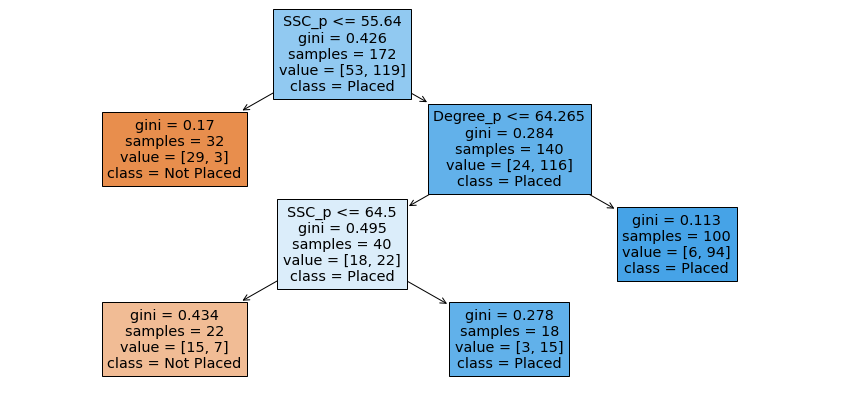

In [49]:
dc = DecisionTreeClassifier(ccp_alpha = 0.0195)
dc.fit(X_train, y_train)
plt.figure(figsize=(15,7))
tree.plot_tree(dc, filled= True, class_names = ['Not Placed', 'Placed'], feature_names = train.columns)

# Hyperparameter Tuning

Learn about **Hperparameter Tuning**: [GFG]( https://www.geeksforgeeks.org/hyperparameter-tuning/)

In [50]:
params = {
    'RandomForest': {
        'model': RandomForestClassifier(),
        'params':{
            'n_estimators': [int(x) for x in np.linspace(start = 1, stop = 1200, num = 10)],
            'max_depth': [int(x) for x in np.linspace(start = 1, stop = 30, num = 5)],
            'min_samples_split': [2, 5, 10, 12],
            'min_samples_leaf': [2, 5, 10, 12],
            'max_features': ['auto', 'sqrt'],
            'ccp_alpha': [0.0185, 0.0190, 0.0195, 0.0200],
        }
    },

    'logistic': {
        'model': LogisticRegression(),
        'params': {
            'penalty': ['l1', 'l2', 'elasticnet'],
            'C': [0.25, 0.50, 0.75, 1.0],
            'tol': [1e-10, 1e-5, 1e-4, 1e-3,0.025, 0.25, 0.50],
            'solver': ['lbfgs', 'liblinear', 'saga', 'newton-cg'],
            'multi_class': ['auto', 'ovr', 'multinomial'],
            'max_iter': [int(x) for x in np.linspace(start = 1, stop = 250, num = 10)],
        }
    },
    'D-tree': {
        'model': DecisionTreeClassifier(),
        'params':{
            'criterion': ['gini', 'entropy'],
            'splitter': ['best', 'random'],
            'min_samples_split': [1,2,5,10,12],
            'min_samples_leaf': [1,2,5,10,12],
            'max_features': ['auto', 'sqrt'],
            'ccp_alpha': [0.0185, 0.0190, 0.0195, 0.0200],
        }
    },
    'SVM': {
        'model': SVC(),
        'params':{
            'C': [0.25, 0.50, 0.75, 1.0],
            'tol': [1e-10, 1e-5, 1e-4, 0.025, 0.50, 0.75],
            'kernel': ['linear', 'poly', 'sigmoid', 'rbf'],
            'max_iter': [int(x) for x in np.linspace(start = 1, stop = 250, num = 10)],
        }
    }
}

In [51]:
scores = []
for model_name, mp in params.items():

  clf = RandomizedSearchCV(mp['model'], param_distributions = mp['params'], cv = 5, n_iter = 10, n_jobs = -1, scoring  ='accuracy')
  clf.fit(X_train, y_train)
  scores.append({
      'model_name': model_name,
      'best_score': clf.best_score_,
      'best_estimator': clf.best_estimator_
  })

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
40 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueError: Solver n

In [52]:
scores_df = pd.DataFrame(data = scores, columns = ['model_name', 'best_score', 'best_estimator'])
scores_df.head()

,model_name,best_score,best_estimator
0,RandomForest,0.877983,"(DecisionTreeClassifier(ccp_alpha=0.0185, max_..."
1,logistic,0.825882,"LogisticRegression(max_iter=84, multi_class='o..."
2,D-tree,0.831261,"DecisionTreeClassifier(ccp_alpha=0.019, criter..."
3,SVM,0.860504,"SVC(max_iter=56, tol=1e-05)"


In [53]:
scores

[{'model_name': 'RandomForest',
  'best_score': 0.8779831932773108,
  'best_estimator': RandomForestClassifier(ccp_alpha=0.0185, max_depth=22, min_samples_leaf=2,
                         min_samples_split=5, n_estimators=933)},
 {'model_name': 'logistic',
  'best_score': 0.8258823529411765,
  'best_estimator': LogisticRegression(max_iter=84, multi_class='ovr', solver='saga')},
 {'model_name': 'D-tree',
  'best_score': 0.8312605042016807,
  'best_estimator': DecisionTreeClassifier(ccp_alpha=0.019, criterion='entropy',
                         max_features='auto', min_samples_split=12)},
 {'model_name': 'SVM',
  'best_score': 0.8605042016806722,
  'best_estimator': SVC(max_iter=56, tol=1e-05)}]

In [54]:
# random forest model

rf = RandomForestClassifier(ccp_alpha = 0.02, max_depth=10, max_features= 'sqrt',
                            min_samples_leaf = 2, min_samples_split=12, n_estimators=267)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.813953488372093


In [55]:
# logistic regression

lr = LogisticRegression(C=0.25, max_iter = 111, multi_class = 'ovr', solver= 'newton-cg',
                        tol = 1e-05)

lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.8604651162790697


In [56]:
# decision tree

dc = DecisionTreeClassifier(ccp_alpha= 0.019, criterion='entropy', max_features='auto', min_samples_leaf = 5, min_samples_split=5, splitter = 'random')
dc.fit(X_train, y_train)
y_pred = dc.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.7674418604651163


In [57]:
print(metrics.classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.43      0.60        14
           1       0.78      1.00      0.88        29

    accuracy                           0.81        43
   macro avg       0.89      0.71      0.74        43
weighted avg       0.85      0.81      0.79        43



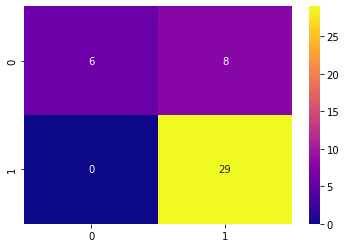

In [59]:
cn = metrics.confusion_matrix(y_test, rf.predict(X_test))
sn.heatmap(cn, annot = True, cmap= 'plasma')

# Model Testing

In [61]:
traindata = np.array(train)
predicted = []
for i in range(len(traindata)):
  predicted.append(rf.predict([traindata[i]]))

predicted

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does 

[array([1]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([0]),
 array([0]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([0]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([0]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([0]),
 array([0]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),

In [62]:
resultdf = train.copy()
resultdf['Actual'] = np.array(test)
resultdf['Predicted'] = np.array(predicted)
resultdf.head()

,Work Experince,SSC_p,SSC_b,HSC_s,High School_p,Degree_p,MBA_p,Gender,Actual,Predicted
0,0,67.00,1,1,91.00,58.00,58.80,1,1,1
1,1,79.33,0,2,78.33,77.48,66.28,1,1,1
2,0,65.00,0,0,68.00,64.00,57.80,1,1,1
3,0,56.00,0,2,52.00,52.00,59.43,1,0,0
4,0,85.80,0,1,73.60,73.30,55.50,1,1,1


In [63]:
resultdf['Actual'].value_counts()

1    148
0     67
Name: Actual, dtype: int64

In [64]:
resultdf['Predicted'].value_counts()

1    167
0     48
Name: Predicted, dtype: int64

In [65]:
getmappings

{'gender': {'F': 0, 'M': 1},
 'ssc_b': {'Central': 0, 'Others': 1},
 'hsc_b': {'Central': 0, 'Others': 1},
 'hsc_s': {'Arts': 0, 'Commerce': 1, 'Science': 2},
 'degree_t': {'Comm&Mgmt': 0, 'Others': 1, 'Sci&Tech': 2},
 'workex': {'No': 0, 'Yes': 1},
 'specialization': {'Mkt&Fin': 0, 'Mkt&HR': 1},
 'status': {'Not Placed': 0, 'Placed': 1}}

# Predicted Probaility

In [66]:
traindata = np.array(train)
predicted = []
for i in range(len(traindata)):
  predicted.append(rf.predict_proba([traindata[i]]))

predicted

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does 

[array([[0.21969245, 0.78030755]]),
 array([[0.06950759, 0.93049241]]),
 array([[0.2327941, 0.7672059]]),
 array([[0.87237123, 0.12762877]]),
 array([[0.08095563, 0.91904437]]),
 array([[0.68453209, 0.31546791]]),
 array([[0.71355037, 0.28644963]]),
 array([[0.09162664, 0.90837336]]),
 array([[0.07882834, 0.92117166]]),
 array([[0.58049022, 0.41950978]]),
 array([[0.49775019, 0.50224981]]),
 array([[0.07236347, 0.92763653]]),
 array([[0.76240895, 0.23759105]]),
 array([[0.26152813, 0.73847187]]),
 array([[0.77715207, 0.22284793]]),
 array([[0.09460921, 0.90539079]]),
 array([[0.12387792, 0.87612208]]),
 array([[0.73570373, 0.26429627]]),
 array([[0.45904135, 0.54095865]]),
 array([[0.18393106, 0.81606894]]),
 array([[0.14923758, 0.85076242]]),
 array([[0.10294632, 0.89705368]]),
 array([[0.14726143, 0.85273857]]),
 array([[0.12729607, 0.87270393]]),
 array([[0.0872079, 0.9127921]]),
 array([[0.82453095, 0.17546905]]),
 array([[0.07154379, 0.92845621]]),
 array([[0.12331795, 0.87668205]

In [67]:
predicted[0][0], predicted[0][0][0], predicted[0][0][1]

(array([0.21969245, 0.78030755]), 0.219692448376968, 0.780307551623032)

In [68]:
resultdf['Prob_not_getting_placed'] = np.array([predicted[i][0][0] for i in range(len(predicted))])
resultdf['Prob_getting_placed'] = np.array([predicted[i][0][1] for i in range(len(predicted))])
resultdf

,Work Experince,SSC_p,SSC_b,HSC_s,High School_p,Degree_p,MBA_p,Gender,Actual,Predicted,Prob_not_getting_placed,Prob_getting_placed
0,0,67.00,1,1,91.00,58.00,58.80,1,1,1,0.219692,0.780308
1,1,79.33,0,2,78.33,77.48,66.28,1,1,1,0.069508,0.930492
2,0,65.00,0,0,68.00,64.00,57.80,1,1,1,0.232794,0.767206
3,0,56.00,0,2,52.00,52.00,59.43,1,0,0,0.872371,0.127629
4,0,85.80,0,1,73.60,73.30,55.50,1,1,1,0.080956,0.919044
...,...,...,...,...,...,...,...,...,...,...,...,...
210,0,80.60,1,1,82.00,77.60,74.49,1,1,1,0.089898,0.910102
211,0,58.00,1,2,60.00,72.00,53.62,1,1,1,0.254972,0.745028
212,1,67.00,1,1,67.00,73.00,69.72,1,1,1,0.072667,0.927333
213,0,74.00,1,1,66.00,58.00,60.23,0,1,1,0.284088,0.715912


In [69]:
# saving the model

import pickle
file = open('campusplacementpredictor.pkl', 'wb')
pickle.dump(rf, file)
file.close()

Conclusions:


*   16 records were missclassified, resulting in the accuracy of 93% on testing data.

*   Random Forest model gave the best results.

